In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [4]:
russell_df = pd.read_csv("russell2000pvdata.csv", error_bad_lines = False)
vars = ['open', 'high', 'low', 'close', 'volume']
rawdata = {}
period = 20           #NUMBER OF TRADING DAYS TO COMPUTE MEAN REVERSION OVER.  THIS IS A PARAMETER FOR FITTING
universesize = 2000                 #SIZE OF PORTFOLIO IN NUMBER OF STOCKS.  IF THIS IS MORE THAN 2000, IT WILL GENERALLY JUST BE CAPPED AT 2000 SINCE BASE UNIVERSE IS RUSSELL 2000
maxindividualweight = 0.01          #MAXIMUM FRACTION A SINGLE POSITION CAN TAKE UP OF ENTIRE PORTFOLIO.  0.01 MEANS 1%.  i.e. if you have a portfolio of $100 million, max single position size is $1 million

b'Skipping line 109845: expected 8 fields, saw 11\n'


In [5]:
for tvar in vars:
    rawdata[tvar] = russell_df.loc[:, ['tickerid', 'ticker', 'date', tvar]]
    rawdata[tvar] = rawdata[tvar].pivot(index = 'date', columns = 'ticker', values = tvar)
    rawdata[tvar] = rawdata[tvar].iloc[:, :universesize]

In [6]:
closing_data = rawdata['close']
closing_data.dropna(axis=1, inplace=True)
closing_data

ticker,AADR,AAON,AAWW,ABCB,ABEO,ABG,ABM,ABR,ACCO,ACIW,...,X,XOMA,XPER,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
20101227,29.590000,8.586667,57.250000,10.920000,129.00,18.100000,26.760000,5.99,8.75,9.066667,...,58.070000,122.800003,22.309999,17.730000,27.940001,47.759998,4.83,4.49,28.830000,0.55
20101228,29.590000,8.524444,56.500000,10.960000,124.50,17.820000,26.790001,5.95,8.71,9.133333,...,58.279999,95.000000,22.260000,17.750000,27.719999,45.119999,4.71,4.26,28.650000,0.55
20101229,29.790001,8.548148,56.810001,11.070000,123.50,18.450001,26.730000,6.00,8.75,9.203333,...,58.509998,102.000000,22.340000,17.580000,28.469999,44.480000,4.75,4.28,28.209999,0.58
20101230,29.730000,8.548148,56.490002,10.740000,122.50,18.799999,26.600000,5.88,8.77,9.146667,...,59.020000,106.599998,22.100000,17.309999,28.860001,46.400002,4.77,4.31,27.709999,0.62
20101231,29.840000,8.358519,55.830002,10.540000,124.00,18.480000,26.299999,5.96,8.52,8.956667,...,58.419998,102.599998,22.150000,17.290001,28.680000,45.360001,4.66,4.27,26.870001,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,59.939999,64.839996,56.000000,38.590000,1.60,147.649994,40.610001,14.73,9.02,38.990002,...,18.559999,41.439999,19.980000,47.689999,15.200000,20.299999,2.97,7.53,38.410000,14.25
20201218,60.779999,64.320000,55.270000,37.799999,1.54,142.600006,39.930000,14.21,8.95,38.540001,...,16.870001,45.560001,20.440001,47.259998,13.950000,19.990000,2.89,8.41,37.910000,14.00
20201221,60.049999,64.239998,55.389999,36.669998,1.55,141.460007,38.700001,13.79,8.65,38.090000,...,17.379999,45.610001,20.040001,46.020000,13.470000,20.209999,2.80,8.33,36.630001,13.94


In [88]:
ema_short = closing_data.ewm(span=50, adjust=False).mean()
ema_long = closing_data.ewm(span=200, adjust=False).mean()

In [89]:
cross = np.where(ema_short > ema_long, 'True', 'False')
ticker = closing_data.columns.values.tolist()
date = list(closing_data.index.values)

In [90]:
cross = pd.DataFrame(cross, columns = ticker, index = date)
cross

,AADR,AAON,AAWW,ABCB,ABEO,ABG,ABM,ABR,ACCO,ACIW,...,X,XOMA,XPER,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZYXI
20101227,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20101228,False,False,False,True,False,False,True,False,False,True,...,True,False,False,True,False,False,False,False,False,False
20101229,True,False,False,True,False,True,False,False,False,True,...,True,False,False,False,True,False,False,False,False,True
20101230,True,False,False,False,False,True,False,False,False,True,...,True,False,False,False,True,False,False,False,False,True
20101231,True,False,False,False,False,True,False,False,False,True,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,False,False,True,True,False
20201218,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,False,False,True,True,False
20201221,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,False,False,True,True,False
20201222,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,False,False,True,True,False


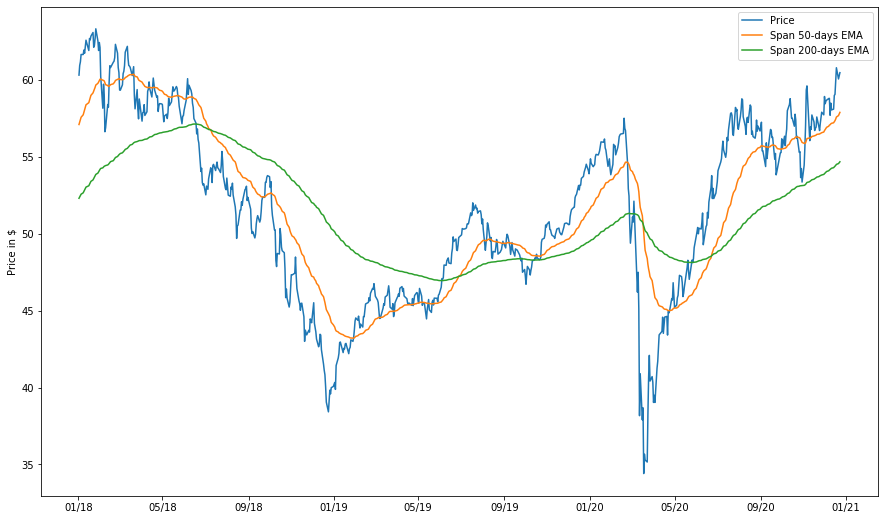

In [91]:
start_date = '20180101'
end_date = '20201223'

fig, ax = plt.subplots(figsize=(15,9))

date_index = pd.to_datetime(closing_data.loc[start_date:end_date,'AADR'].index, format='%Y%m%d')
ax.plot(date_index, closing_data.loc[start_date:end_date,'AADR'], label='Price')
ax.plot(date_index, ema_short.loc[start_date:end_date, 'AADR'], label = 'Span 50-days EMA')
ax.plot(date_index, ema_long.loc[start_date:end_date, 'AADR'], label = 'Span 200-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [92]:
trading_positions_raw = ema_short - ema_long
trading_positions_raw
trading_positions = trading_positions_raw.apply(np.sign) * 1/len(ticker)
trading_positions

ticker,AADR,AAON,AAWW,ABCB,ABEO,ABG,ABM,ABR,ACCO,ACIW,...,X,XOMA,XPER,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
20101227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20101228,0.000000,-0.000847,-0.000847,0.000847,-0.000847,-0.000847,0.000847,-0.000847,-0.000847,0.000847,...,0.000847,-0.000847,-0.000847,0.000847,-0.000847,-0.000847,-0.000847,-0.000847,-0.000847,0.000000
20101229,0.000847,-0.000847,-0.000847,0.000847,-0.000847,0.000847,-0.000847,-0.000847,-0.000847,0.000847,...,0.000847,-0.000847,-0.000847,-0.000847,0.000847,-0.000847,-0.000847,-0.000847,-0.000847,0.000847
20101230,0.000847,-0.000847,-0.000847,-0.000847,-0.000847,0.000847,-0.000847,-0.000847,-0.000847,0.000847,...,0.000847,-0.000847,-0.000847,-0.000847,0.000847,-0.000847,-0.000847,-0.000847,-0.000847,0.000847
20101231,0.000847,-0.000847,-0.000847,-0.000847,-0.000847,0.000847,-0.000847,-0.000847,-0.000847,0.000847,...,0.000847,-0.000847,-0.000847,-0.000847,0.000847,-0.000847,-0.000847,-0.000847,-0.000847,0.000847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,0.000847,0.000847,0.000847,0.000847,-0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,...,0.000847,0.000847,0.000847,0.000847,0.000847,-0.000847,-0.000847,0.000847,0.000847,-0.000847
20201218,0.000847,0.000847,0.000847,0.000847,-0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,...,0.000847,0.000847,0.000847,0.000847,0.000847,-0.000847,-0.000847,0.000847,0.000847,-0.000847
20201221,0.000847,0.000847,0.000847,0.000847,-0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,...,0.000847,0.000847,0.000847,0.000847,0.000847,-0.000847,-0.000847,0.000847,0.000847,-0.000847


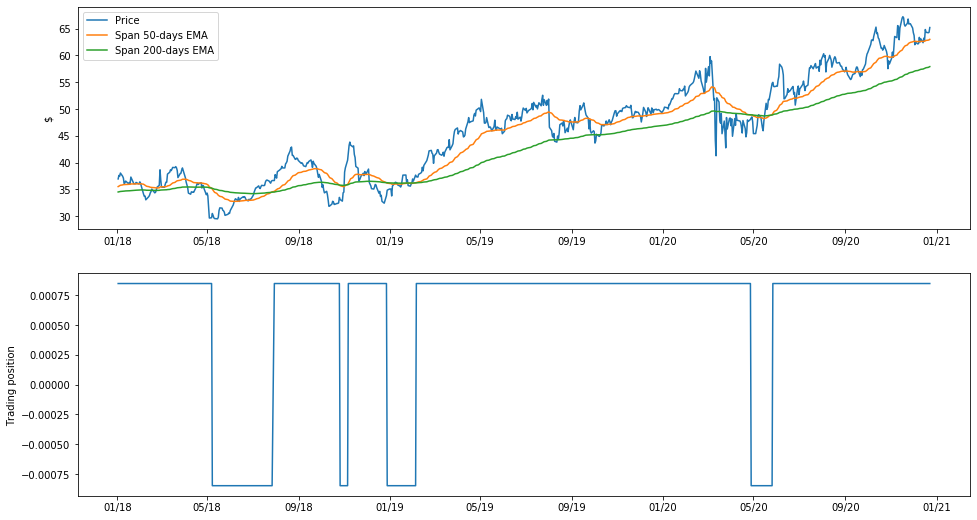

In [93]:
trading_positions_final = trading_positions.shift(1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(date_index, closing_data.loc[start_date:end_date,'AAON'], label='Price')
ax1.plot(date_index, ema_short.loc[start_date:end_date, 'AAON'], label = 'Span 50-days EMA')
ax1.plot(date_index, ema_long.loc[start_date:end_date, 'AAON'], label = 'Span 200-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(date_index, trading_positions_final.loc[start_date:end_date, 'AAON'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [94]:
asset_log_returns = np.log(closing_data).diff()
asset_log_returns

ticker,AADR,AAON,AAWW,ABCB,ABEO,ABG,ABM,ABR,ACCO,ACIW,...,X,XOMA,XPER,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
20101227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101228,0.000000,-0.007273,-0.013187,0.003656,-0.035507,-0.015591,0.001120,-0.006700,-0.004582,0.007326,...,0.003610,-0.256680,-0.002244,0.001127,-0.007905,-0.056863,-0.025159,-0.052584,-0.006263,0.000000
20101229,0.006736,0.002777,0.005472,0.009986,-0.008065,0.034743,-0.002242,0.008368,0.004582,0.007635,...,0.003939,0.071096,0.003587,-0.009624,0.026697,-0.014286,0.008457,0.004684,-0.015477,0.053110
20101230,-0.002016,0.000000,-0.005649,-0.030264,-0.008130,0.018792,-0.004875,-0.020203,0.002283,-0.006176,...,0.008679,0.044111,-0.010801,-0.015478,0.013606,0.042260,0.004202,0.006985,-0.017883,0.066691
20101231,0.003693,-0.022433,-0.011752,-0.018798,0.012171,-0.017168,-0.011342,0.013514,-0.028920,-0.020991,...,-0.010218,-0.038246,0.002260,-0.001156,-0.006257,-0.022669,-0.023331,-0.009324,-0.030783,-0.032790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,0.014960,0.030694,0.008428,0.001296,-0.018576,0.019629,0.006671,0.021964,0.028108,0.009276,...,0.010290,0.031624,0.018692,0.001679,-0.048790,0.014889,0.073331,0.010681,0.019719,0.027029
20201218,0.013917,-0.008052,-0.013121,-0.020684,-0.038221,-0.034801,-0.016886,-0.035940,-0.007791,-0.011609,...,-0.095472,0.094784,0.022762,-0.009057,-0.085816,-0.015389,-0.027305,0.110526,-0.013103,-0.017700
20201221,-0.012083,-0.001245,0.002169,-0.030350,0.006473,-0.008027,-0.031288,-0.030002,-0.034094,-0.011745,...,0.029783,0.001097,-0.019763,-0.026588,-0.035015,0.010945,-0.031637,-0.009558,-0.034347,-0.004295


In [95]:
raw_return = asset_log_returns*trading_positions
raw_return

ticker,AADR,AAON,AAWW,ABCB,ABEO,ABG,ABM,ABR,ACCO,ACIW,...,X,XOMA,XPER,YORW,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZYXI
date,,,,,,,,,,,,,,,,,,,,,
20101227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20101228,0.000000,0.000006,0.000011,0.000003,0.000030,0.000013,9.487601e-07,0.000006,0.000004,0.000006,...,3.056549e-06,2.173414e-04,0.000002,9.546112e-07,0.000007,0.000048,0.000021,0.000045,0.000005,0.000000
20101229,0.000006,-0.000002,-0.000005,0.000008,0.000007,0.000029,1.898553e-06,-0.000007,-0.000004,0.000006,...,3.335039e-06,-6.019976e-05,-0.000003,8.148708e-06,0.000023,0.000012,-0.000007,-0.000004,0.000013,0.000045
20101230,-0.000002,-0.000000,0.000005,0.000026,0.000007,0.000016,4.128124e-06,0.000017,-0.000002,-0.000005,...,7.348623e-06,-3.735028e-05,0.000009,1.310549e-05,0.000012,-0.000036,-0.000004,-0.000006,0.000015,0.000056
20101231,0.000003,0.000019,0.000010,0.000016,-0.000010,-0.000015,9.603992e-06,-0.000011,0.000024,-0.000018,...,-8.652080e-06,3.238406e-05,-0.000002,9.787925e-07,-0.000005,0.000019,0.000020,0.000008,0.000026,-0.000028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201217,0.000013,0.000026,0.000007,0.000001,0.000016,0.000017,5.648462e-06,0.000019,0.000024,0.000008,...,8.712718e-06,2.677738e-05,0.000016,1.421564e-06,-0.000041,-0.000013,-0.000062,0.000009,0.000017,-0.000023
20201218,0.000012,-0.000007,-0.000011,-0.000018,0.000032,-0.000029,-1.429843e-05,-0.000030,-0.000007,-0.000010,...,-8.083973e-05,8.025706e-05,0.000019,-7.669333e-06,-0.000073,0.000013,0.000023,0.000094,-0.000011,0.000015
20201221,-0.000010,-0.000001,0.000002,-0.000026,-0.000005,-0.000007,-2.649305e-05,-0.000025,-0.000029,-0.000010,...,2.521855e-05,9.287486e-07,-0.000017,-2.251325e-05,-0.000030,-0.000009,0.000027,-0.000008,-0.000029,0.000004


In [96]:
raw_return["total"] = raw_return.sum(axis=1)
raw_return["cum return"] = raw_return['total'].cumsum()


In [97]:
raw_return[["total", "cum return"]]

ticker,total,cum return
date,,
20101227,0.000000,0.000000
20101228,0.014162,0.014162
20101229,0.006711,0.020873
20101230,0.003796,0.024669
20101231,0.005986,0.030655
...,...,...
20201217,0.005475,0.224503
20201218,-0.003369,0.221134
20201221,-0.002276,0.218858


In [98]:
start_date = '20100101'
end_date = '20201223'

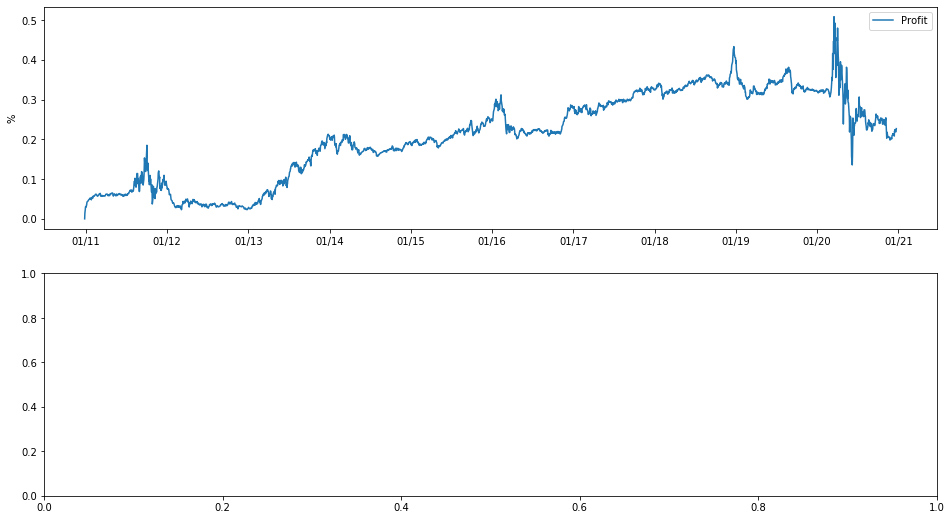

In [99]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

date_index = pd.to_datetime(raw_return.loc[start_date:end_date, 'total'].index, format='%Y%m%d')
ax1.plot(date_index, raw_return.loc[start_date:end_date,'total'].cumsum(), label='Profit')


ax1.set_ylabel('%')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)